# ClaimKG : automatic fact-checking
## Project HMSN232 :
### Authors :
Claudia Restrepo-Ortiz ep. Auguet, n° étudiant : 21914554

Xavier Grand, n° étudiant : 20064097

# Librairies import

In [1]:
import sys
#!{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install nltk
# !{sys.executable} -m pip install unicodedata
# !{sys.executable} -m pip install contractions
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install inflect
# !{sys.executable} -m pip install pycountry
# !{sys.executable} -m pip install pycountry-convert
# !{sys.executable} -m pip install seaborn

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#import for Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import for preTraitment :
import nltk #Natural Language Toolkit
import unicodedata #
import contractions #
import inflect #To transform digits in words 
import numpy as np
import string
from nltk.corpus import stopwords #
from nltk.tokenize import word_tokenize #Tokenize the text into array
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# import for Vectorization :
from sklearn.feature_extraction.text import TfidfVectorizer

#import for classification :
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from time import time

# Tools
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Data FactChecking import :

## Original Project Dataset : 'claim_extraction_18_10_2019_annotated.csv'

Dataset provided by teachers.

In [55]:
# Original Project Dataset :
factChecking = pd.read_csv('Dataset/claim_extraction_18_10_2019_annotated.csv', sep = ',', encoding = "utf8")
# factChecking = factChecking.dropna(subset=["rating_bestRating"])
print("Original Project Dataset loaded")

Original Project Dataset loaded


,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,...,extra_entities_body,extra_entities_claimReview_claimReviewed,extra_entities_keywords,extra_refered_links,extra_tags,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating
0,0,NaN,snopes,NaN,Finnish President Sauli Niinistö posted a vide...,2019-10-07,snopes,https://www.snopes.com/fact-check/president-fi...,NaN,NaN,...,"[{""id"" : 33057"",""""begin"": 46,""end"": 57,""entity...","[{""id"" : 1042690"",""""begin"": 18,""end"": 32,""enti...",[],"https://t.co/Oo5Q56ALAu,https://twitter.com/ia...",NaN,Did the President of Finland Post a Video Resp...,False,NaN,NaN,NaN


         Unnamed: 0  claimReview_author  claimReview_author_url  \
count  39218.000000                 0.0                     0.0   
mean    7865.392447                 NaN                     NaN   
std     5467.201490                 NaN                     NaN   
min        0.000000                 NaN                     NaN   
25%     2777.000000                 NaN                     NaN   
50%     7679.000000                 NaN                     NaN   
75%    12581.000000                 NaN                     NaN   
max    18474.000000                 NaN                     NaN   

       rating_bestRating  rating_ratingValue  rating_worstRating  
count        3432.000000         3432.000000         3164.000000  
mean            6.405012            2.697990            1.012168  
std             0.989383            1.715669            0.221213  
min            -1.000000           -1.000000           -1.000000  
25%             5.000000            1.000000            1.000

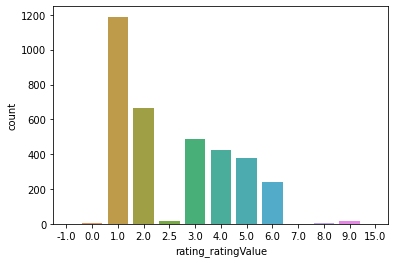

In [58]:
# display dataset :
display(factChecking.head(1))
print(factChecking.describe())

# Dataset du projet :
sns.countplot(x='rating_ratingValue', data=factChecking)
# factChecking["rating_alternateName"].unique()

## Alternative Dataset (from ClaimKG, TRUE or FALSE only)

New Dataset, obtain in ClaimKG's Claims Search portal. Only TRUE and FALSE assertions in english are requested :

https://data.gesis.org/claimskg/explorer/search?page=1&truthRatings=3,1&languages=English&entitiesConjunctionMode=false&entitiesSearchIncludeArticles=false&keywordsConjunctionMode=false

        truthRating      labels
count  10000.000000  10000.0000
mean       1.526800      0.2634
std        0.880999      0.4405
min        1.000000      0.0000
25%        1.000000      0.0000
50%        1.000000      0.0000
75%        3.000000      1.0000
max        3.000000      1.0000


,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language,labels
0,http://data.gesis.org/claimskg/claim_review/b0...,GOP presidential candidate Ted Cruz ran a 'Net...,Unknown,1,False,Unknown,Ted Cruz Doesn’t Want to ‘Netflix and Chill’ w...,"Netflix,Netflix and Chill,Republican,Ted Cruz,...","Netflix and Chill,Ted Cruz","politics, ted cruz",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/ted-cruz-net...,English,0


0 = FALSE & 1 = TRUE


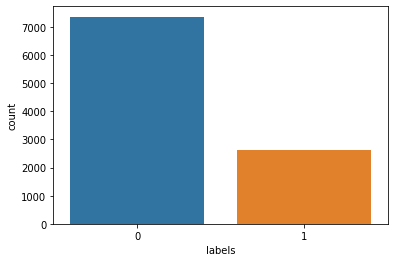

In [2]:
# Alternative Dataset (from ClaimKG, TRUE or FALSE only)
factChecking = pd.read_csv('Dataset/claimskg_result(TRUE_Vs_FALSE).csv', sep = ',', encoding = "utf8")

# Creation of TRUE Vs FALSE feature : Named 'labels'
label = []
for ratingname in factChecking['truthRating']: 
    if ratingname == 1:
        label.append(0)
    elif ratingname == 3:
        label.append(1)
factChecking['labels'] = label

# display dataset :
print(factChecking.describe())

display(factChecking.head(1))

print("0 = FALSE & 1 = TRUE")
# sns.countplot(x='truthRating', data=factChecking)
sns.countplot(x='labels', data=factChecking)

## Alternative Dataset (from ClaimKG, {TRUE & FALSE} Vs MIXTURE)

New Dataset, obtain in ClaimKG's Claims Search portal. TRUE, FALSE and MIXTURE assertions in english are requested :

https://data.gesis.org/claimskg/explorer/search?page=1&truthRatings=3,2,1&languages=English&entitiesConjunctionMode=false&entitiesSearchIncludeArticles=false&keywordsConjunctionMode=false

        truthRating        labels
count  10000.000000  10000.000000
mean       1.715600      0.607200
std        0.725513      0.488397
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        2.000000      1.000000
max        3.000000      1.000000
['MIXTURE' 'FALSE' 'TRUE']
0 = MIXTURE & 1 = TRUE/FALSE


,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language,labels
0,http://data.gesis.org/claimskg/claim_review/c2...,'And the revenue generated by drilling off Vir...,2012-02-15,2,MIXTURE,Jim Moran,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",politifact,http://www.politifact.com,http://www.politifact.com/virginia/statements/...,English,0


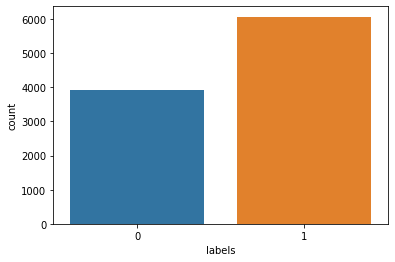

In [61]:
# Alternative Dataset (from ClaimKG, {TRUE & FALSE} Vs MIXTURE)
factChecking = pd.read_csv('Dataset/claimskg_result(TRUE-FALSE_Vs_MIXTURE).csv', sep = ',', encoding = "utf8")

# Creation of {TRUE & FALSE} Vs MIXTURE feature : Named 'labels'
label = []
for ratingname in factChecking['ratingName']: 
    if ratingname == 'MIXTURE':
        label.append(0)
    else :
        label.append(1)
factChecking['labels'] = label

# display dataset :

print(factChecking.describe())

print(factChecking["ratingName"].unique())
print("0 = MIXTURE & 1 = TRUE/FALSE")
display(factChecking.head(1))
sns.countplot(x='labels', data=factChecking)

# Features selection and display

## Feature : 'source'

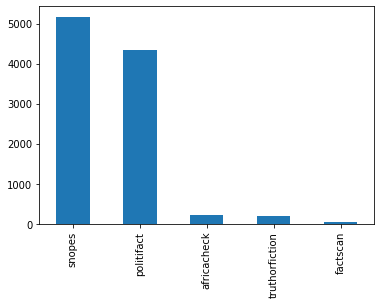

In [3]:
factChecking['source'].value_counts().plot(kind='bar')

## Feature : 'author'

In [4]:
factChecking['author'].value_counts()

Unknown                         5599
Bloggers                         244
Donald Trump                     225
Barack Obama                     123
Viral image                      123
                                ... 
Mark Sickles                       1
Young Conservatives of Texas       1
Rosa DeLauro                       1
Top Stories USA                    1
Heidi Group                        1
Name: author, Length: 1739, dtype: int64

### The dataset is too big for our computers... We reduce by considering non-anonymous assertions... To gain in time of computation.

### FACULTATIVE.

In [5]:
factChecking1=factChecking[factChecking.author != 'Unknown']
display(factChecking1.head(1))

,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language,labels
8,http://data.gesis.org/claimskg/claim_review/19...,'If you need to call 911 but are scared to bec...,2019-06-23,1,False,Viral image,This 911-pepperoni-pizza tip is a myth,"Facebook,LAPD,Los Angeles Police Department,Re...",pepperoni,"Crime,Public Safety",politifact,http://www.politifact.com,http://www.politifact.com/facebook-fact-checks...,English,0


# Extraction of Dataset to traitment :

## Alternative Dataset (from ClaimKG, TRUE or FALSE only)

### Not reduced Dataset (With Unknown authors)

In [3]:
factChecking2 = factChecking[['text','author', 'source', 'truthRating']]
factChecking2

,text,author,source,truthRating
0,GOP presidential candidate Ted Cruz ran a 'Net...,Unknown,snopes,1
1,A woman managed to call 911 during a domestic ...,Unknown,snopes,1
2,The California Department of Public Health has...,Unknown,snopes,1
3,Michelle Obama gorged herself on an expensive ...,Unknown,snopes,1
4,A child injured his arm through extended weari...,Unknown,snopes,3
...,...,...,...,...
9995,A woman performed her own abortion with a 'U-A...,Unknown,snopes,1
9996,Hillary Clinton wore a 'secret earpiece' at NB...,Unknown,snopes,1
9997,Tucker Carlson hired an actor to play a protes...,Unknown,snopes,1
9998,Are up to a third of South Africans at risk of...,Unknown,africacheck,1


### Reduced Dataset (Without Unknown authors)

In [6]:
factChecking2 = factChecking1[['text','author', 'source', 'truthRating']]
factChecking2

,text,author,source,truthRating
8,'If you need to call 911 but are scared to bec...,Viral image,politifact,1
9,The United States 'is not building the aircraf...,Marco Rubio,politifact,1
13,"Amid the 'crisis at our southern border,' ther...",Phil Gingrey,politifact,1
16,'Every engine manufacturer in the United State...,Rick Perry,politifact,1
19,The National Defense Authorization Act for fis...,Roy Blunt,politifact,3
...,...,...,...,...
9989,'The KKK was formed by the Democratic Party.',Bloggers,politifact,1
9990,''Wrong precinct' rules exacerbate our provisi...,Kathleen Clyde,politifact,3
9992,"'Today, the Social Security system is broke.'",Steve Lonegan,politifact,1
9993,'Bill McCollum has accepted thousands from lob...,Rick Scott,politifact,1


## Alternative Dataset (from ClaimKG, {TRUE & FALSE} Vs MIXTURE)

### Not reduced Dataset (With Unknown authors)

In [6]:
factChecking2 = factChecking[['text','author', 'source', 'labels']]
factChecking2

,text,author,source,labels
0,GOP presidential candidate Ted Cruz ran a 'Net...,Unknown,snopes,0
1,A woman managed to call 911 during a domestic ...,Unknown,snopes,0
2,The California Department of Public Health has...,Unknown,snopes,0
3,Michelle Obama gorged herself on an expensive ...,Unknown,snopes,0
4,A child injured his arm through extended weari...,Unknown,snopes,1
...,...,...,...,...
9995,A woman performed her own abortion with a 'U-A...,Unknown,snopes,0
9996,Hillary Clinton wore a 'secret earpiece' at NB...,Unknown,snopes,0
9997,Tucker Carlson hired an actor to play a protes...,Unknown,snopes,0
9998,Are up to a third of South Africans at risk of...,Unknown,africacheck,0


### Reduced Dataset (Without Unknown authors)

In [50]:
factChecking2 = factChecking1[['text','author', 'source', 'labels']]
factChecking2

,text,author,source,labels
0,'And the revenue generated by drilling off Vir...,Jim Moran,politifact,0
1,Health insurance companies pay CEOs $24 millio...,Health Care for America Now,politifact,0
4,Oil money from federal leases 'can only be use...,Bill Nelson,politifact,0
5,'The Georgia Lottery Corp. has only once in th...,Allie McCullen,politifact,1
6,"'When Mitt Romney was governor, Massachusetts ...",Barack Obama,politifact,0
...,...,...,...,...
9994,'More than 25 million Americans are unemployed...,Occupied Wall Street Journal,politifact,0
9996,"In the past year, DeKalb has 'attracted and re...",Lee May,politifact,0
9997,Says Minnesota is 'imprisoning half as many pe...,Mike McCabe,politifact,0
9998,"The state of Georgia has lost 200,000 total jo...",Kasim Reed,politifact,1


# Selection of interesting colomns :

Creation of Assertions and Features array : X

Creation of Label array : y

In this part, we can consider different datasets :

* Original Project Dataset
* Alternative Dataset (from ClaimKG, TRUE or FALSE only)
* Alternative Dataset (from ClaimKG, TRUE & FALSE Vs MIXTURE)
* Alternative Dataset with feautures

In [7]:
# convert dataframe in numpy :
#array = factChecking.values
array = factChecking2.values

# Dataset du projet :
# X = array[:,4] #assertions
# y = array[:,21] #rating_alternateName

# Alternative Dataset (from ClaimKG, TRUE or FALSE only)
#X = array[:,1] #assertions
#y = array[:,3] #rating_alternateName

# several features, Alternative Datasets (both)
X = array[:,0:3] #assertions, author, source, 
y = array[:,3] #truthRating

display(X)
display(y)

array([["'If you need to call 911 but are scared to because of someone in the room dial and ask for a pepperoni pizza.'",
        'Viral image', 'politifact'],
       ["The United States 'is not building the aircraft, the long-range bombers, the additional aircraft carriers, the nuclear submarines.'",
        'Marco Rubio', 'politifact'],
       ["Amid the 'crisis at our southern border,' there are 'reports of illegal migrants carrying deadly diseases such as … Ebola virus.'",
        'Phil Gingrey', 'politifact'],
       ...,
       ["'Today, the Social Security system is broke.'", 'Steve Lonegan',
        'politifact'],
       ["'Bill McCollum has accepted thousands from lobbyists for Planned Parenthood.'",
        'Rick Scott', 'politifact'],
       ["'75 percent of the town boards in Wisconsin have no women on them at all.'",
        'Erin Forrest', 'politifact']], dtype=object)

array([1, 1, 1, ..., 1, 1, 3], dtype=object)

# Pre-traitements :

1- Supression of non ASCII caracters

2- Supression of contractions

3- Tokenizing

4- Lowercase

5- Supression of commas, dots, etc.

6- Supression of stopwords

7- Replacement of digits

8- Lemmatisation

9- To test, suppression of verbs, teacher's advice ;-)

## Function definition to Pre-traitments :

In [8]:
stop_words = set(stopwords.words('english'))

# print(stop_words)

def preTraitment(assertion) :
    # Removing non ASCII characters
    assertion = unicodedata.normalize('NFKD', assertion).encode("ascii", "ignore").decode("utf-8", 'ignore')
    # Removing contractions
    assertion = contractions.fix(assertion, slang = False)
    # Tokenizing
    assertion = word_tokenize(assertion)
    # Lowercase
    assertion = [word.lower() for word in assertion]
    # Replacement of digits
    inflectEngine = inflect.engine()
    newWords = []
    for word in assertion:
        if word[0].isdigit():
            newWords.append(inflectEngine.number_to_words(word, decimal = "point"))
        else:
            newWords.append(word)
        assertion = newWords
    # Supression of commas, dots, etc.
    newWords = []
    for word in assertion:
        newWords.append(word.translate(str.maketrans(dict.fromkeys(string.punctuation))))
    assertion = newWords
    # Lemmatization
    lemmatization = WordNetLemmatizer()
    assertion = [lemmatization.lemmatize(word, pos = 'v') for word in assertion]
    # Stopwords
    newWords = []
    for word in assertion:
        if (word not in stop_words) :
            newWords.append(word)
    assertion = newWords
    #removing empty words
    newWords = []
    for word in assertion:
        if (word != '') :
            newWords.append(word)
    assertion = newWords
    # Sentense consolidation
    assertion = "".join([" " + i for i in assertion]).strip()
    
    return assertion


## Pre-traitment of corpus

In [9]:
corpus = []

for assertion in X:
    corpus.append(preTraitment(str(assertion)))
    
print(corpus[0:5])

['need call nine hundred and eleven scar someone room dial ask pepperoni pizza viral image politifact', 'unite state build aircraft longrange bombers additional aircraft carriers nuclear submarine marco rubio politifact', 'amid crisis southern border report illegal migrants carry deadly diseases ebola virus phil gingrey politifact', 'every engine manufacturer unite state state texas rick perry politifact', 'national defense authorization act fiscal year two thousand and nineteen include largest pay raise nearly ten years roy blunt politifact']


## y transform

In [10]:
y = y.astype(np.int)
y

array([1, 1, 1, ..., 1, 1, 3])

# Scikit learn vectorization :

## Vectorisation :

### TfidfVectorizer :

In [11]:
vectorizer = TfidfVectorizer(
)

X = vectorizer.fit_transform(corpus).toarray()

df = pd.DataFrame(
    data=vectorizer.transform(corpus).toarray(),
    columns=vectorizer.get_feature_names()
)

display(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Scikit learn Classification :

## Split dataset :

training set (70%) & test set (30%)

In [12]:
from sklearn.model_selection import train_test_split 

validation_size = 0.3 #30% du jeu de données pour le test

testsize = 1 - validation_size
seed = 30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

display(X_test)
display(y_train)

(1320, 8668)
(3081, 8668)
(1320,)
(3081,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([1, 3, 3, ..., 1, 1, 1])

## Classifications :

In [14]:
# Scoring method :

scoring = 'accuracy'

# Training models :

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC(gamma='auto')))
models.append(('DTC', DecisionTreeClassifier(random_state=1)))
models.append(('GNB', GaussianNB()))
models.append(('MLP',MLPClassifier(random_state=1, max_iter=1000)))
models.append(('LR',
               LogisticRegression(random_state=1,
                                  solver='newton-cg',
                                  multi_class='multinomial')))

models.append(('LSVC', LinearSVC()))
models.append(('PPN', Perceptron(tol=1e-3, random_state=0)))
models.append(('RFC',RandomForestClassifier(max_depth=2, random_state=0)))

# Evaluation :

results = []
names = []


for name, model in models:
    
    # Cross-Validation :
    
    kfold = model_selection.KFold(n_splits=10, random_state=8)
    
    # Results : kfold training
    
    cv_results = model_selection.cross_val_score(model,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring=scoring)
    
    # Results, classifiers & cross-validation recuperation :
    
    results.append(cv_results)
    names.append(name)
    
    # Display the results :
    
    msg = "%s: Accuracy => %f STD => (%f)" % (name, cv_results.mean(),
                                              cv_results.std())
    
    print(msg)

KNN: Accuracy => 0.675758 STD => (0.026634)
SVM: Accuracy => 0.683333 STD => (0.044921)
DTC: Accuracy => 0.660606 STD => (0.025080)
GNB: Accuracy => 0.614394 STD => (0.046138)
MLP: Accuracy => 0.682576 STD => (0.029623)
LR: Accuracy => 0.700000 STD => (0.035078)
LSVC: Accuracy => 0.695455 STD => (0.037848)
PPN: Accuracy => 0.620455 STD => (0.021280)
RFC: Accuracy => 0.683333 STD => (0.044921)


# confusion matrix

In [15]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy_score(y_test, predictions)
    #plot_confusion_matrix(model, X_test, y_test)
    print(name)
    print("Accuracy = ", accuracy_score(y_test, predictions))
    print("\nJournal de Classification \n\n",classification_report(y_test, predictions))

KNN
Accuracy =  0.6686140863356054

Journal de Classification 

               precision    recall  f1-score   support

           1       0.73      0.82      0.77      2104
           3       0.47      0.34      0.40       977

    accuracy                           0.67      3081
   macro avg       0.60      0.58      0.58      3081
weighted avg       0.65      0.67      0.65      3081

SVM
Accuracy =  0.6828951639078221

Journal de Classification 

               precision    recall  f1-score   support

           1       0.68      1.00      0.81      2104
           3       0.00      0.00      0.00       977

    accuracy                           0.68      3081
   macro avg       0.34      0.50      0.41      3081
weighted avg       0.47      0.68      0.55      3081



/home/xiav/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DTC
Accuracy =  0.6426484907497566

Journal de Classification 

               precision    recall  f1-score   support

           1       0.73      0.75      0.74      2104
           3       0.43      0.40      0.42       977

    accuracy                           0.64      3081
   macro avg       0.58      0.58      0.58      3081
weighted avg       0.64      0.64      0.64      3081

GNB
Accuracy =  0.6254462836741318

Journal de Classification 

               precision    recall  f1-score   support

           1       0.72      0.74      0.73      2104
           3       0.40      0.38      0.39       977

    accuracy                           0.63      3081
   macro avg       0.56      0.56      0.56      3081
weighted avg       0.62      0.63      0.62      3081

MLP
Accuracy =  0.6845180136319376

Journal de Classification 

               precision    recall  f1-score   support

           1       0.74      0.82      0.78      2104
           3       0.50      0.39      0.4

/home/xiav/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Boxplot of results :

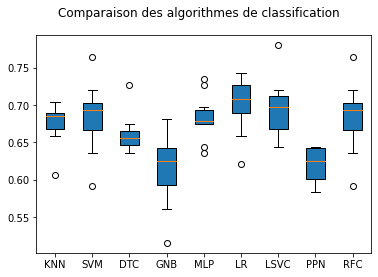

In [16]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes de classification')
ax = fig.add_subplot(111)
plt.boxplot(results, patch_artist=True)
ax.set_xticklabels(names)
plt.show()

# this part is something that would be nice to do, but I'm afraid with such a big data set it's going to be very complicated... 

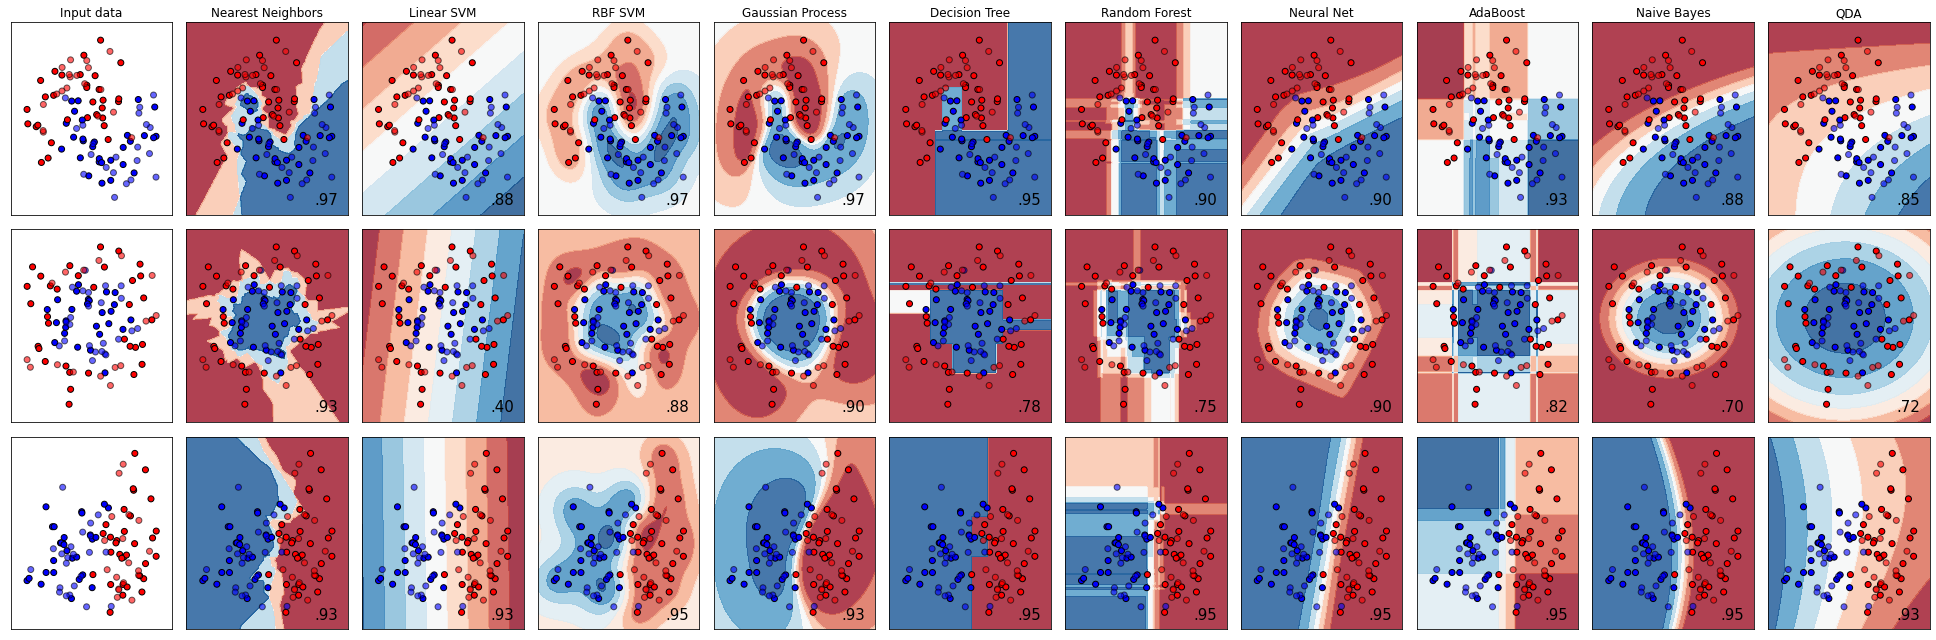

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()